#  Homework 1 (HW1)
Deadline: September 22 at 11:59pm

The homework must be handed in through the Moodle system. 

<span style="color:red">Provide a written answer if requested in the exercise! These questions are marked in red.</span>

---

## Exercise 1 (HW1/1)

In this exercise we will investigate income inequality and life expectancy indicators for different countries and regions. (60%)

**a)** Import the *countries.csv* file (located in the Data folder of the parent directory of the current file) into a pandas DataFrame and name it *countries*. (Hint: use relative path). From the Gapminder database (http://www.gapminder.org/data/), find and import the *Income per person (GDP/capita, PPP$ inflation-adjusted)* and *Life expentancy (years)* files into pandas Dataframes; name them *income* and *life_exp* respectively. You should import the data directly from the web page, without dowloading it to your computer. (Hint: Use the  *pandas.read_excel()* function!) <br>


In [1]:
import pandas as pd

In [2]:
countries = pd.read_csv(r'./Data/countries.csv')
life_exp = pd.read_excel("https://github.com/Gapminder-Indicators/lex/raw/master/lex-by-gapminder.xlsx", 'countries_and_territories')
income = pd.read_excel("https://github.com/Gapminder-Indicators/gdppc_cppp/raw/master/gdppc_cppp-by-gapminder.xlsx", 'countries_and_territories')

**b)** Represent the distribution of income per capita (across countries) for a given year (for example: 2007) with a histogram!  



array([[<AxesSubplot:title={'center':'2001'}>]], dtype=object)

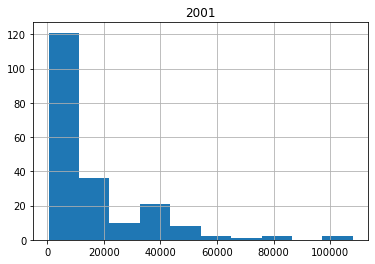

In [3]:
income[['geo.name', 2001]].hist()


c) Write a function that merges the  *countries*, *income* and *life_exp* DataFrames for a given year (this should be the function's input) <br>merge
(Hint: Use the *pd.merge()* function!)

In [4]:
income.rename(
    columns={"geo.name":"Country"}
          ,inplace=True)

life_exp.rename(
    columns={"geo.name":"Country"}
          ,inplace=True)

In [5]:
def mergefunction(year):
    dfnewincome = income[['Country', year]]
    dfnewlifeexp = life_exp[['Country',year]]

    #I'm doing inner join by default since join kind was not specified in the question
    income_country = dfnewincome.merge(dfnewlifeexp, on = 'Country', suffixes= ('_income', '_life_exp'))
    income_country_lifeexp = countries.merge(income_country, on = 'Country')
    
    return income_country_lifeexp

In [6]:
mergeddf = mergefunction(2001)
mergeddf.head(10)

,Country,Region,2001_income,2001_life_exp
0,Algeria,AFRICA,10382.0,74.13
1,Angola,AFRICA,3540.0,53.64
2,Benin,AFRICA,1703.0,57.76
3,Botswana,AFRICA,10279.0,45.76
4,Burundi,AFRICA,751.0,49.03
5,Cameroon,AFRICA,2553.0,54.43
6,Cape Verde,AFRICA,3845.0,70.02
7,Central African Republic,AFRICA,839.0,44.40
8,Chad,AFRICA,1068.0,52.44
9,Comoros,AFRICA,1479.0,62.39


**d)** Using the dataframe created in point c), present a [boxplot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html) of the distribution of income per capita (across countries) for the years 1950 and 2010 grouped by region (continent). <span style="color:red">What changed in 60 years?</span>
(Hints: 1. Use the *pd.boxplot* function! 2. Use a logarithmic scale for the income axis!)

In [7]:
import numpy as np

"\nIn all 6 Regions, the income seems to have increased in the last 60 years. \nIn Africa, there seems to be a slightly bigger gap and wider spread in income between the counties.\nIn Asia, the gap in income has icreased but the lower and upper bounds have significantly risen\nIn Europe, the gap in income seems to have stayed the same, but as a region the income seems to have risen. \nIn North America, there seems to be a slight increase in the income gap, but the income has risen as a region\nIn Oceania, there also seems to be a slight decrease in the income gap,but income has risen as a region\nIn South America, there isn't much change in the income gap, but as a region the income seems to have shifted up. \n"

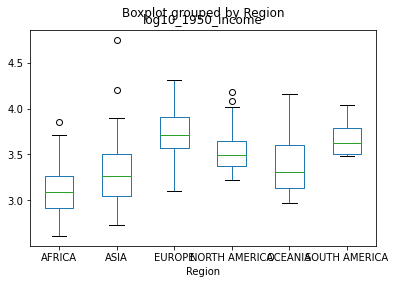

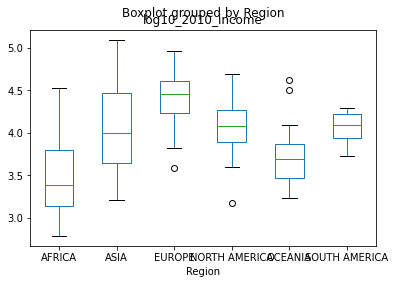

In [8]:
df1950 = mergefunction(1950)
df1950['log10_1950_income'] = np.log10(df1950['1950_income'])
#df1950_by_region = df1950.groupby("Region")
df1950.boxplot(by ='Region', column =['log10_1950_income'], grid = False)

df2010 = mergefunction(2010)
df2010['log10_2010_income'] = np.log10(df2010['2010_income'])
#df2010_by_region = df2010.groupby("Region")
df2010.boxplot(by ='Region', column =['log10_2010_income'], grid = False)

# What changed in 60 years? 
'''
In all 6 Regions, the income seems to have increased in the last 60 years. 
In Africa, there seems to be a slightly bigger gap and wider spread in income between the counties.
In Asia, the gap in income has icreased but the lower and upper bounds have significantly risen
In Europe, the gap in income seems to have stayed the same, but as a region the income seems to have risen. 
In North America, there seems to be a slight increase in the income gap, but the income has risen as a region
In Oceania, there also seems to be a slight decrease in the income gap,but income has risen as a region
In South America, there isn't much change in the income gap, but as a region the income seems to have shifted up. 
'''

**e)** Represent the relationship between income per capita and life expectancy for a given year using a [scatter plot](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.plot.scatter.html) based on the dataframe created in point c). (Hint: choose a year where there aren't many missing values!) 
<span style="color:red">What can you conclude from the plot?</span>

'\nThere is a positive correlation between life expectancy and income per capita, but it is not linear and it is not too strong. \nThis is true for all the regions as seen below.\nThis might suggest that income can have some impact on life expectancy, but there are probably other factors that play a role in determining life expectancy than just income.Country\nFurther statistical analysis will have to be done in order to make a stastical significant conclusion.\n'

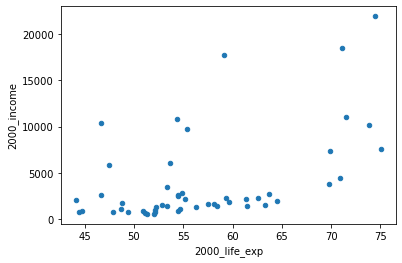

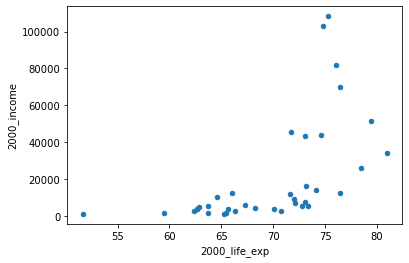

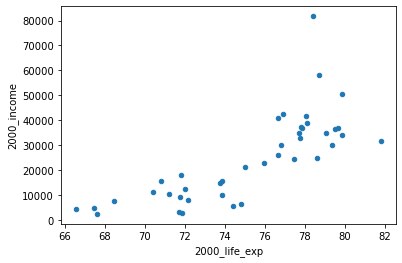

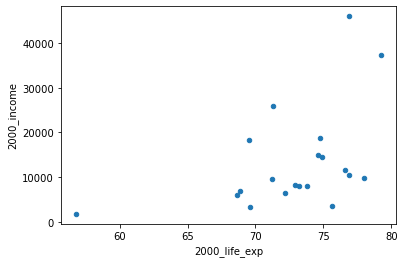

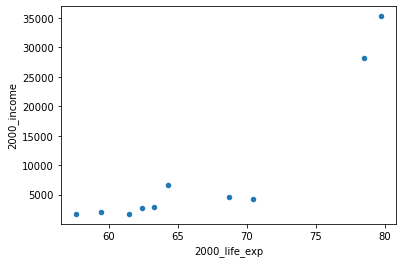

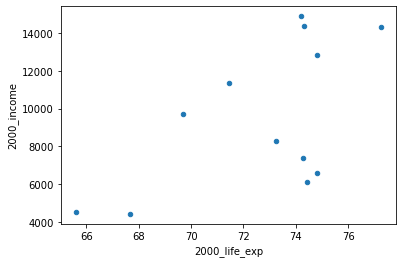

In [9]:
df2000 = mergefunction(2000)
df2000_by_region = df2000.groupby("Region")

# df2000_by_region.head()

df2000_by_region.plot.scatter(x = '2000_life_exp', y = '2000_income')

# What can you conclude from the plot?

'''
There is a positive correlation between life expectancy and income per capita, but it is not linear and it is not too strong. 
This is true for all the regions as seen below.
This might suggest that income can have some impact on life expectancy, but there are probably other factors that play a role in determining life expectancy than just income.Country
Further statistical analysis will have to be done in order to make a stastical significant conclusion.
'''


**f)** OPTIONAL for 5% extra credit: From the Gapminder database, find and import the CO2 emissions per capita  file into a pandas dataframe, and call it *co2_emissions*. Represent the relationship between CO2 emissions and income in whatever way you choose. <span style="color:red">Describe your plot and what conclusions you can draw from it. Be sure to discuss the limitations of the datasets and how these may mitigate your conclusions.</span>

/var/folders/sb/m_nb6ncx4lsdn36hzj30v6xw0000gn/T/ipykernel_30424/88715004.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  co2_emissions_2001.rename(


<AxesSubplot:xlabel='2001_income', ylabel='2001_co2_emission'>

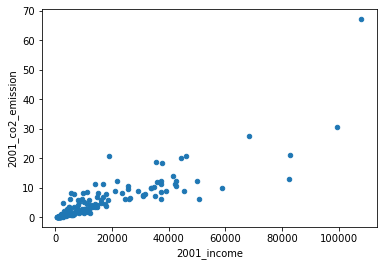

In [10]:
co2_emissions = pd.read_csv(r'./Data/co2_emissions_tonnes_per_person.csv')

#select column 2001 and countries

co2_emissions_2001 = co2_emissions[['country', '2001']]

co2_emissions_2001.rename(
    columns={"country":"Country"}
          ,inplace=True)

df2001 = mergefunction(2001)
df2001_country_income = df2001[['Country', '2001_income']]

co2_income = df2001_country_income.merge(co2_emissions_2001, on='Country')

co2_income.rename(
    columns={"2001":"2001_co2_emission"}
          ,inplace=True)

co2_income.plot.scatter(x = '2001_income', y = '2001_co2_emission')

#The limitation is there are few data points, and most of them are concentrated in the bottom left of the plot, 
# which is basically low income and low emissions. We don't have enough data to conclude that there is a linear
# relationship between the income and co2_emissions


## Exercise 2 (HW1/2)

In this exercise we will investigate the data scientist job offers of the  most important job search website in the U.S ([indeed.com](http://www.indeed.com)). (40%)

**a)**  Using the *selenium* and *BeautifulSoap* packages, import the search results for the keyword *data scientist*, that is, the content of this URL: https://www.indeed.com/q-Data-Scientist-jobs.html?vjk=9ba2eaf21a524a1e 

Write a function that returns the number of results of the query - i.e. how many job offers! (Hint: Look for the 'div' HTML tag with the 'id' attribute with a value of 'searchCountPages'! Note that you can always work backward by searching for the correct number in the HTML string and viewing the corresponding tag and attribute values)

In [11]:
import selenium
from bs4 import BeautifulSoup

In [12]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

driver = webdriver.Chrome(ChromeDriverManager().install())

[WDM] - Downloading: 100%|██████████| 8.15M/8.15M [00:00<00:00, 26.0MB/s]
/var/folders/sb/m_nb6ncx4lsdn36hzj30v6xw0000gn/T/ipykernel_30424/2160715986.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


In [13]:
url = "https://www.indeed.com/q-Data-Scientist-jobs.html?vjk=9ba2eaf21a524a1e"
driver.get(url)

In [14]:
source = driver.page_source
soup = BeautifulSoup(source)
soup.prettify

<bound method Tag.prettify of <html class="js-focus-visible" data-js-focus-visible="" dir="ltr" lang="en"><head>
<link href="/images/favicon.ico" rel="shortcut icon"/>
<title>Data Scientist Jobs, Employment | Indeed.com</title>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="19,923 Data Scientist jobs available on Indeed.com. Apply to Data Scientist, Junior Data Scientist and more!" name="description"/>
<meta content="Data Scientist Jobs, Employment,  careers,  employment,  job listings,  job search,  search engine, work in " name="keywords"/>
<meta content="origin-when-cross-origin" name="referrer"/>
<link href="/q-Data-Scientist-jobs.html" rel="canonical"/>
<link href="android-app://com.indeed.android.jobsearch/https/www.indeed.com/m/jobs?q=Data+Scientist&amp;vjk=9ba2eaf21a524a1e&amp;redirected=1" rel="alternate"/>
<link href="ios-app://https/www.indeed.com/m/jobs?q=Data+Scientist&amp;vjk=9ba2eaf21a524a1e&amp;redirected=1" rel="alternate"/>
<link h

In [15]:
def query_number():
    query = soup.find('div', id = 'searchCountPages')
    return query.text

**b)** What are the most common terms in the job offer adds on indeed.com? Analize the first 100 search result pages and create a word cloud of the most popular terms! 

(Hint: When you click "next page" in the search results the link only slightly changes, look at the part of the link that says "start=". You can access the search result pages as: https://www.indeed.com/jobs?q=Data%20Scientist&start=10&vjk=5f448d3b50e88276, https://www.indeed.com/jobs?q=Data%20Scientist&start=20&vjk=5f448d3b50e88276, https://www.indeed.com/jobs?q=Data%20Scientist&start=30&vjk=5f448d3b50e88276 and so on counting by 10 up to https://www.indeed.com/jobs?q=Data%20Scientist&start=990&vjk=5f448d3b50e88276. It may take a few minutes so it is recommended to test your code on one or two pages first and if it works correctly then apply it to the rest of the pages. This way you will save a lot of time if your code needs debugging. ) 
 

(Hint: You can find more information on how to create a Word Cloud at https://www.datacamp.com/community/tutorials/wordcloud-python)

In [16]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline


UsageError: Line magic function `%` not found.


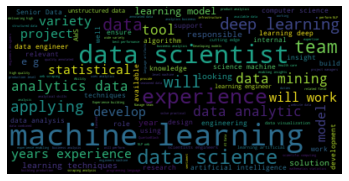

In [17]:
finaltext = ""
for i in range(10, 1000, 10) :
    url = "https://www.indeed.com/jobs?q=Data%20Scientist&start=" + str(i) + "&vjk=5f448d3b50e88276"
    driver.get(url)
    source = driver.page_source
    soup = BeautifulSoup(source)
    tags = soup.findAll('div', {'class': 'job-snippet'})
    for j in tags:
        finaltext += str(j.text)

# code below is from webpage linked in the question for making wordcloud:    
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(finaltext)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**c)** From the previously collected data, retrieve the job offers' location information and represent the 10 most frequent cities on a [horizontal bar chart](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.barh.html)! Filter the "United States" and "Remote" locations from the results, look for cities only!

(Hint: You can find the necessary information in the 'div' HTML-tag with the 'class' attribute with the value 'companyLocation'.)

In [18]:
locations=[]
for i in range(10, 1000, 10) :
    url = "https://www.indeed.com/jobs?q=Data%20Scientist&start=" + str(i) + "&vjk=5f448d3b50e88276"
    driver.get(url)
    source = driver.page_source
    soup = BeautifulSoup(source)
    tags = soup.findAll('div', {'class': 'companyLocation'})
    for j in tags:
        locations.append(j.text)
        
no_remote_list=[]
final_list=[]
city=[]

for i in locations:
    if "Remote" not in i:
        no_remote_list.append(i)

for j in no_remote_list:
    if "United States" not in j:
        final_list.append(j)

for loc in final_list:
    # to ensure only the city part is added to the list
    city.append(loc.split(", ")[0])

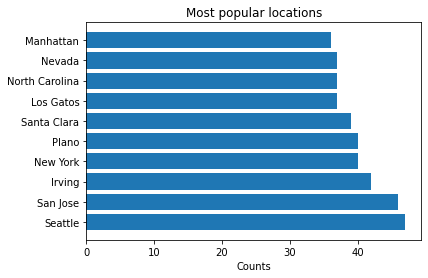

In [19]:
import collections

finaldataset =[]
ctr = collections.Counter(city)
ctr10 = dict(ctr.most_common(10))

#part of code below is from: https://stackoverflow.com/questions/22222573/how-to-plot-counter-object-in-horizontal-bar-chart
# Counter data, counter is your counter object
keys = ctr10.keys()
y_pos = np.arange(len(keys))
# get the counts for each key, assuming the values are numerical
performance = [ctr10[k] for k in keys]

plt.barh(y_pos, performance, align='center')
plt.yticks(y_pos, keys)
plt.xlabel('Counts')
plt.title('Most popular locations')

plt.show()